# Client demographics analysis

## Import demo dataframe

Primero importamos todas las librerías que vamos a necesitar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import and configure %autoreload, so that the functions in the .py file are automatically updated.

In [2]:
%reload_ext autoreload
%autoreload 2
from functions import *

### Cleaning dataframe

In [3]:
df_demo = pd.read_csv('data/df_final_demo.txt')

In [4]:
df_demo = remove_nulls_and_duplicates(df_demo, threshold=0.8)

c:\Users\anano\OneDrive\Documentos\Ironhack\semana_5\project_semana_5\Vanguard-AB-Test-Analysis\functions.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


In [5]:
df_demo = rename_columns_1(df_demo)

In [6]:
df_demo = mean_fill_missing_values(df_demo, 'client_age')

The end result is a dataframe with the following columns that provide information about Vanguard's clients:

- **client_id**: a unique identifier for each client in the dataset
- **client_tenure_yr**: Represents how long the client has been with Vanguard, measured in years.
- **client_tenure_mnth**: Further breaks down the client’s tenure with Vanguard in months.
- **client_age**: Indicates the age of the client.
- **gender**: Specifies the client's gender, where values like "M" indicate male, "F" female, and "U" could represent unknown.
- **num_accounts**: Denotes the number of accounts the client holds with Vanguard.
- **balance**: Gives the total balance spread across all accounts for a particular client.
- **calls_6_month**: Records the number of times the client reached out over a call in the past six months.
- **logons_6_month**: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

### Initial Descriptive Statistics

In [7]:
df_demo.describe().round(2)

,client_id,client_tenure_years,client_tenure_months,client_age,num_accounts,balance,calls_last_6_months,logons_last_6_months
count,70595.00,70595.00,70595.00,70595.00,70595.00,70595.00,70595.00,70595.00
mean,5005020.95,12.05,150.66,46.44,2.26,147445.24,3.38,5.57
std,2877269.22,6.87,82.09,15.59,0.53,301508.71,2.24,2.35
min,169.00,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,2519604.50,6.00,82.00,32.50,2.00,37346.84,1.00,4.00
50%,5016969.00,11.00,136.00,47.00,2.00,63332.90,3.00,5.00
75%,7483063.50,16.00,192.00,59.00,2.00,137544.90,6.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


At this first glance it's striking:
- **Customers with extremely high balances**, who are probably influencing the overall median. It appears that the majority of clients have much lower balances, because of the difference between the median (63,336) and the mean (147,450).
- **The age of customers appears to be balanced**, extremes of very young and very old are rare. The percentile data seem to point towards an adult clientele.
- The **frequency of online interactions is notably more common than call interactions**, reflecting the importance of the digital platform in the customer experience.

## 1. Client_tenure_years

 ### Measures of Centrality

In [8]:
column_to_analyze = 'client_tenure_years'

# Calcular estadísticas para la columna seleccionada
centrality_tenure_years = calculate_centrality(df_demo, column_to_analyze)
centrality_tenure_years

{'Mean': 12.05, 'Median': 11.0, 'Mode': 6.0}

### Measures of Dispersion

In [9]:
column_to_analyze = 'client_tenure_years'

# Calcular estadísticas para la columna seleccionada
dispersion_tenure_years = calculate_dispersion(df_demo, column_to_analyze)
dispersion_tenure_years

{'Variance': 47.22,
 'Standard Deviation': 6.87,
 'Min': 2.0,
 'Max': 62.0,
 'Range': 60.0,
 'Quantiles': {0.25: 6.0, 0.5: 11.0, 0.75: 16.0}}

### Shape of distribution

In [10]:
calculate_skewness_kurtosis(df_demo, 'client_tenure_years')

{'Skewness': 1.04, 'Kurtosis': 1.07}

### Visualizations

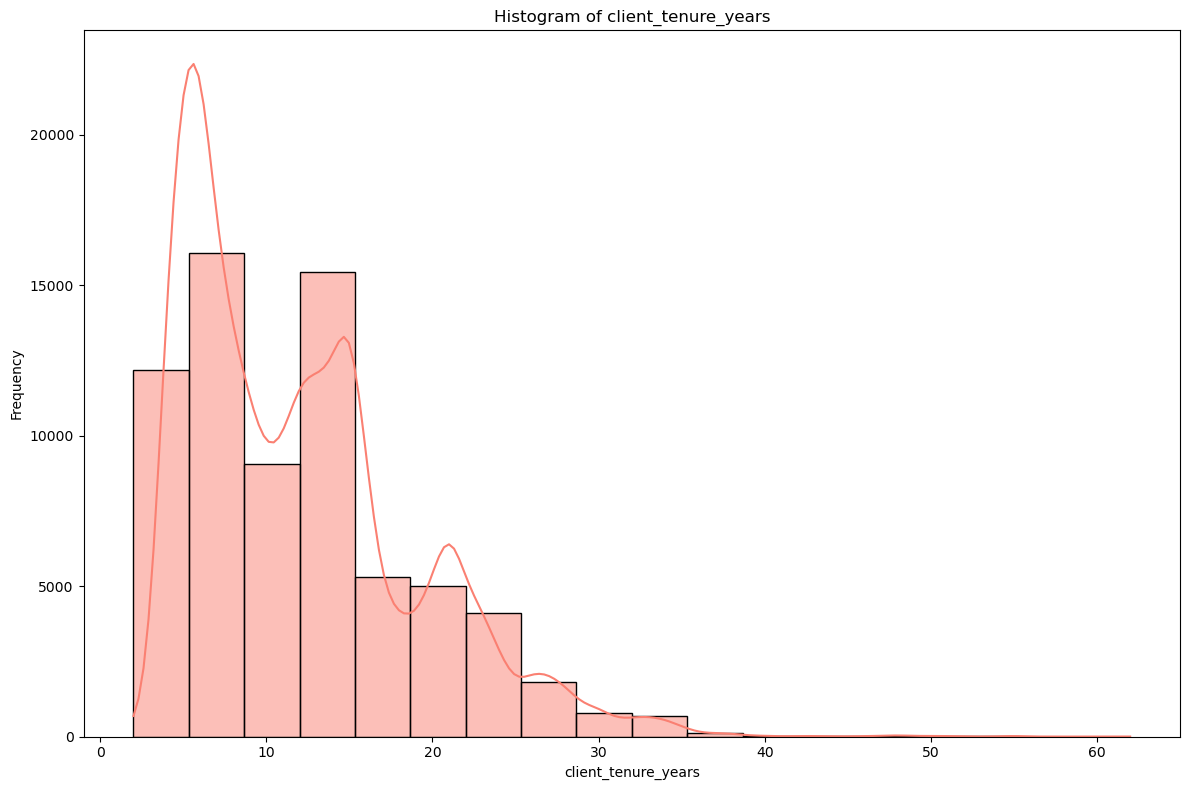

In [11]:
plot_histogram(df_demo, 'client_tenure_years', bins=18)

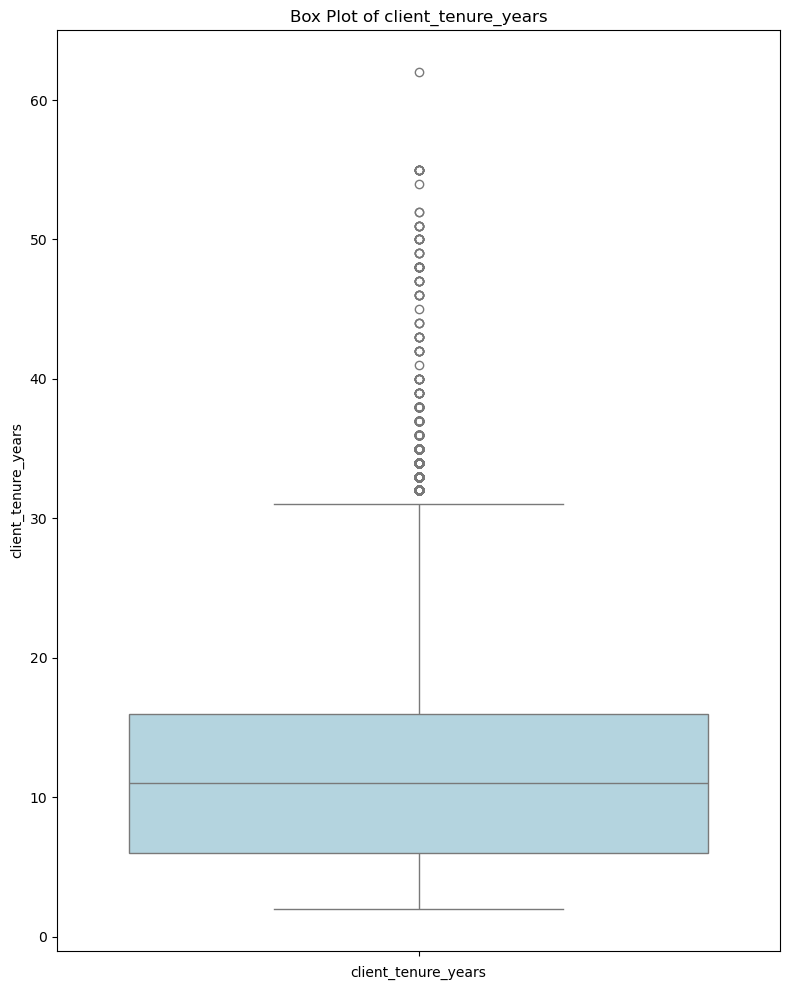

In [12]:
plot_boxplot(df_demo, 'client_tenure_years')

### EDA univariate conclusions

The mean (12.05 years) and the median (11 years) indicate that they have a **well-established customer base**, who are still active after many years with the company.

The fact that there are clients who have been with the company for over 60 years (max = 62 years), indicates a **good retention of long-term clients**.

The distribution is **moderately right-skewed** (1.05), few clients have much more years of tenure, but the clients are **concentrated in the shorter values**, like the Kurtosis (1.07)points out.

Also we can see in the box plot that th 75% of clients are between 6 and 26 aprox. Furthermore, the outliers are all above 30.

## 2. Client_tenure_months

### Mesaures of Centrality

In [13]:
column_to_analyze = 'client_tenure_months'

# Calcular estadísticas para la columna seleccionada
centrality_tenure_months = calculate_centrality(df_demo, column_to_analyze)
centrality_tenure_months

{'Mean': 150.66, 'Median': 136.0, 'Mode': 58.0}

### Measures of Dispersion

In [14]:
column_to_analyze = 'client_tenure_months'

# Calcular estadísticas para la columna seleccionada
dispersion_tenure_months = calculate_dispersion(df_demo, column_to_analyze)
dispersion_tenure_months

{'Variance': 6738.74,
 'Standard Deviation': 82.09,
 'Min': 33.0,
 'Max': 749.0,
 'Range': 716.0,
 'Quantiles': {0.25: 82.0, 0.5: 136.0, 0.75: 192.0}}

### Shape of distribution

In [15]:
calculate_skewness_kurtosis(df_demo, 'client_tenure_months')

{'Skewness': 1.05, 'Kurtosis': 1.1}

### Visualizations

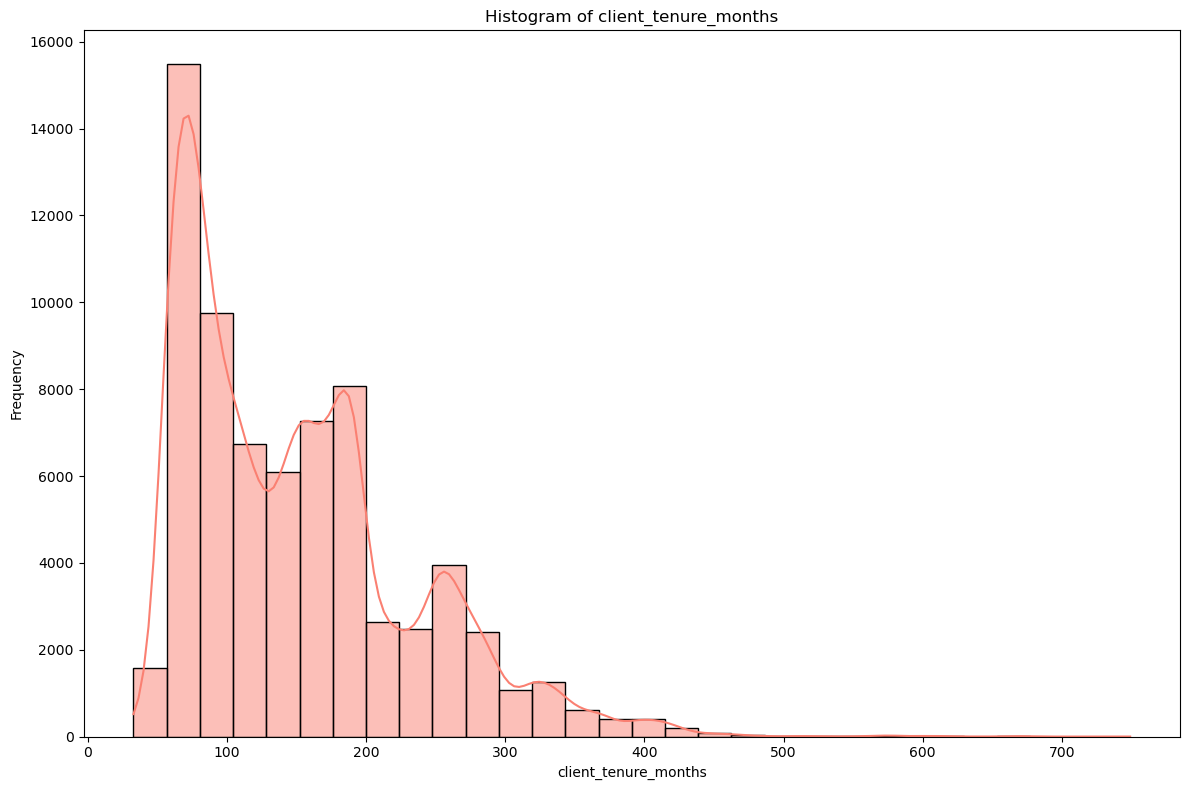

In [16]:
plot_histogram(df_demo, 'client_tenure_months', bins=30)

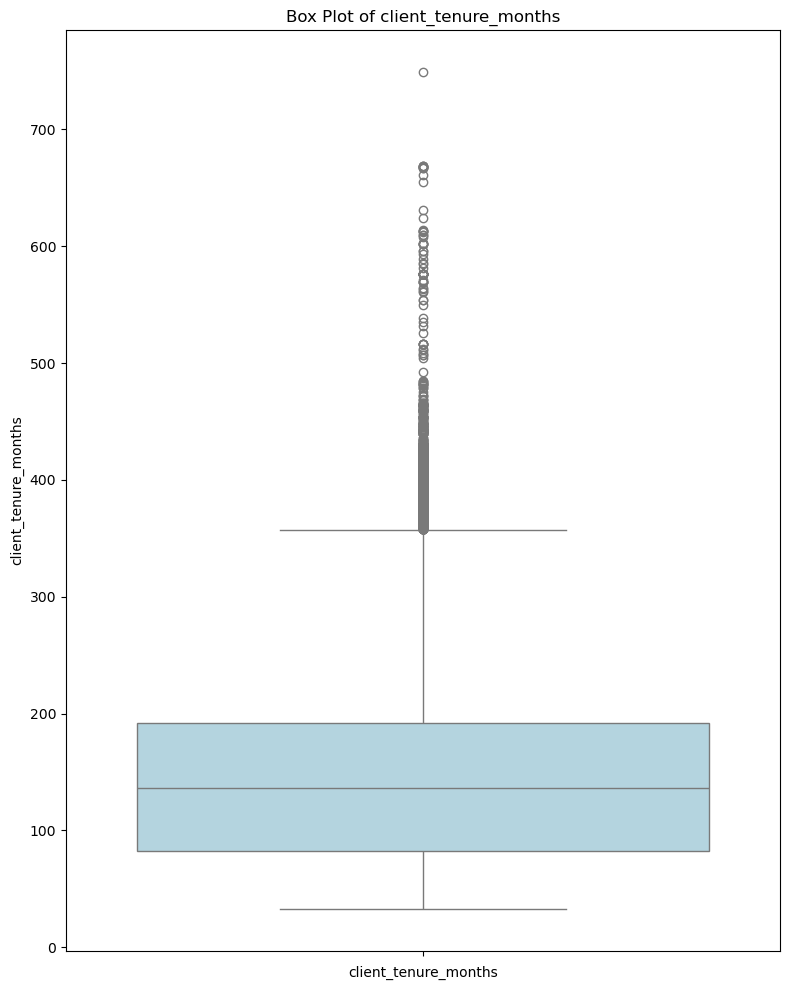

In [17]:
plot_boxplot(df_demo, 'client_tenure_months')

This column quantifies the same information as client_tenure_years, but in months. The conclusions are the same, later it will help us to make the analysis with more detailed numbers.

## 3. Gender

In [18]:
df_demo = df_demo.drop(df_demo[df_demo['gender'] == 'X'].index) 
df_demo = convert_to_categorical(df_demo, 'gender')

In [19]:
# Frequency table for 'gender'
freq_gender = df_demo['gender'].value_counts()

# Calculating the proportion of each unique value in 'gender'
perc_gender = df_demo['gender'].value_counts(normalize=True)

freq_gender, perc_gender

(gender
 U    24122
 M    23724
 F    22746
 Name: count, dtype: int64,
 gender
 U    0.341710
 M    0.336072
 F    0.322218
 Name: proportion, dtype: float64)

### Visualization

c:\Users\anano\OneDrive\Documentos\Ironhack\semana_5\project_semana_5\Vanguard-AB-Test-Analysis\functions.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="pastel")


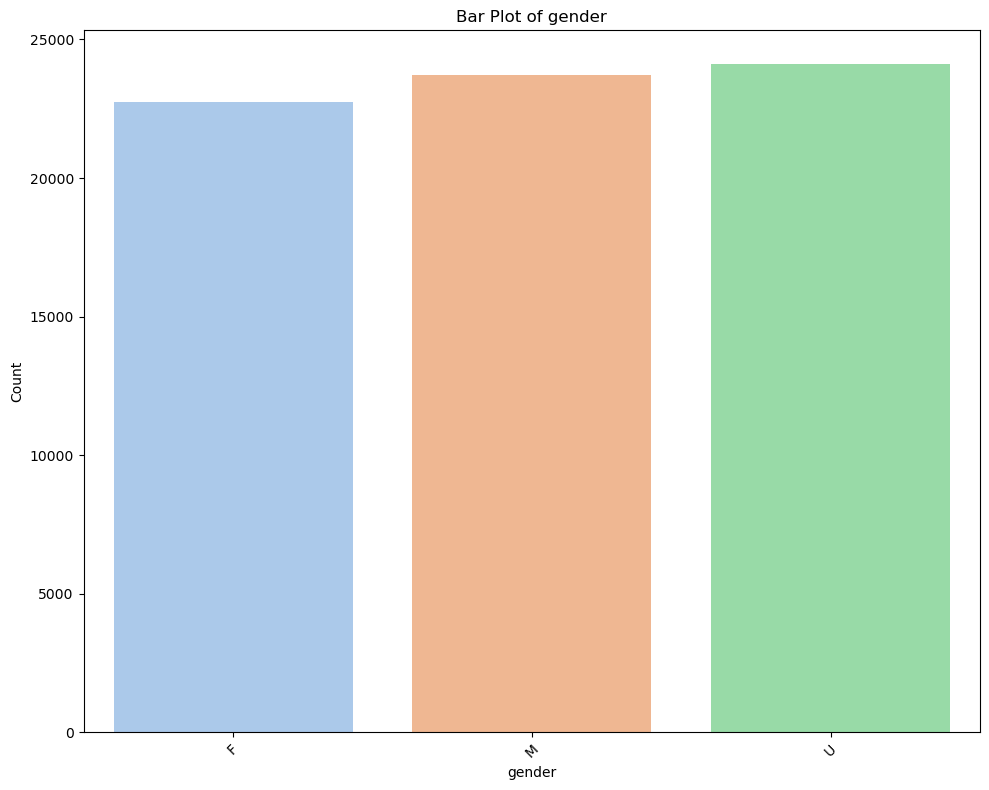

In [20]:
plot_barplot(df_demo, 'gender')

### EDA univariate conclusion

The percentages of men (33%), women (32%) and undefined (34%) are very similar, suggesting that the demographic information is incomplete in this aspect. With the information we have, **no gender seems to stand out** among the clients.

## 4. Client_age

### Mesaures of Centrality

In [21]:
column_to_analyze = 'client_age'

# Calcular estadísticas para la columna seleccionada
centrality_age = calculate_centrality(df_demo, column_to_analyze)
centrality_age 

{'Mean': 46.44, 'Median': 47.0, 'Mode': 58.5}

### Measures of Dispersion

In [22]:
column_to_analyze = 'client_age'

# Calcular estadísticas para la columna seleccionada
dispersion_age= calculate_dispersion(df_demo, column_to_analyze)
dispersion_age

{'Variance': 243.09,
 'Standard Deviation': 15.59,
 'Min': 13.5,
 'Max': 96.0,
 'Range': 82.5,
 'Quantiles': {0.25: 32.5, 0.5: 47.0, 0.75: 59.0}}

### Shape of distribution

In [23]:
calculate_skewness_kurtosis(df_demo, 'client_age')

{'Skewness': 0.08, 'Kurtosis': -0.93}

### Visualization

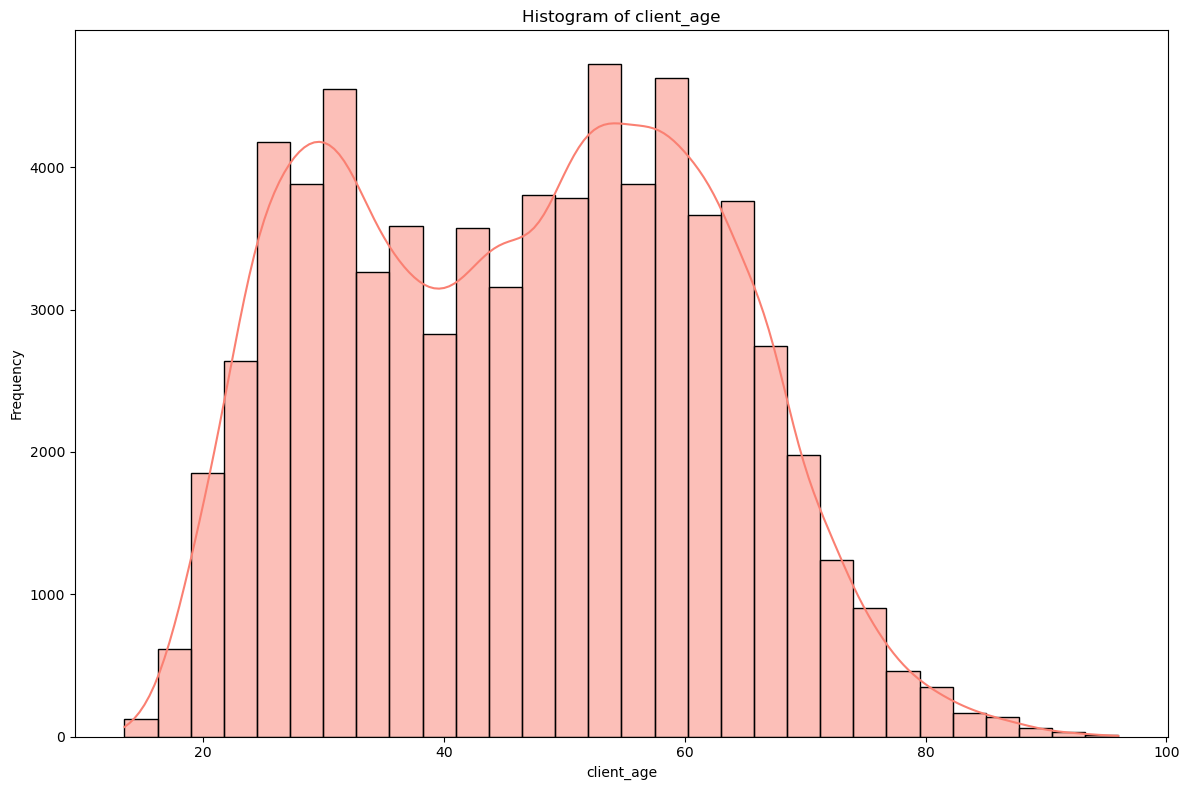

In [24]:
plot_histogram(df_demo, 'client_age', bins=30)

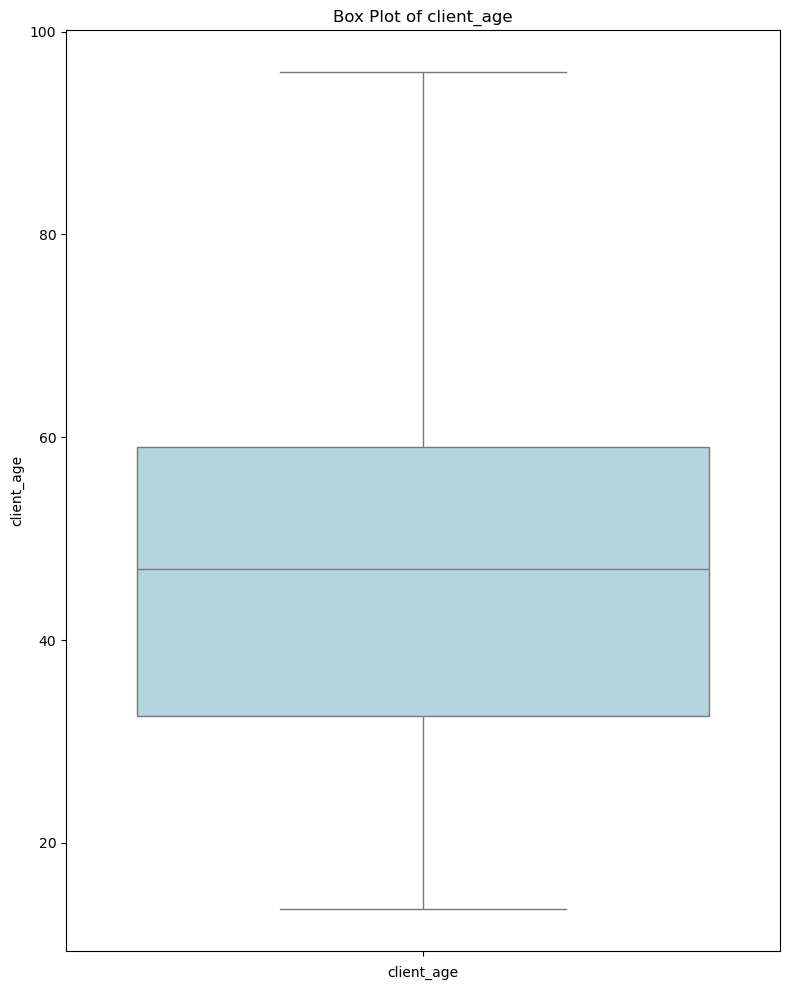

In [25]:
plot_boxplot(df_demo, 'client_age')

### EDA univariate conclusion

The average (46.44 years), median (47 years) and mode (58.5 years) point out that the client base skews **towards middle-aged and older persons**. 

Although the range is very high (82.5) indicating that **the group is diverse**, but concentrated around 35-60 years. As we can see on the moderate standard deviation (15.59) and the fact that 50% of clients are between 32,5 and 59 years old.

In this case, the distribution is **nearly symmetric**, wich means the client ages are balanced. The Kurtosis (-0.93) indicate is flatter than normal or there is more spread. We can see in the box plot that **there's no outliers**.

## 5. Num_accounts

In [26]:
# Frequency table for number of accounts
freq_accounts = df_demo['num_accounts'].value_counts()

# Calculating the proportion of each possible number of accounts
perc_accounts = df_demo['num_accounts'].value_counts(normalize=True)

freq_accounts, perc_accounts

(num_accounts
 2.0    55495
 3.0    12528
 4.0     2241
 5.0      284
 6.0       33
 7.0        8
 1.0        2
 8.0        1
 Name: count, dtype: int64,
 num_accounts
 2.0    0.786137
 3.0    0.177471
 4.0    0.031746
 5.0    0.004023
 6.0    0.000467
 7.0    0.000113
 1.0    0.000028
 8.0    0.000014
 Name: proportion, dtype: float64)

### Mesaures of Centrality

In [27]:
column_to_analyze = 'num_accounts'

# Calcular estadísticas para la columna seleccionada
centrality_accounts = calculate_centrality(df_demo, column_to_analyze)
centrality_accounts

{'Mean': 2.26, 'Median': 2.0, 'Mode': 2.0}

### Measures of Dispersion

In [28]:
column_to_analyze = 'num_accounts'

# Calcular estadísticas para la columna seleccionada
dispersion_accounts = calculate_dispersion(df_demo, column_to_analyze)
dispersion_accounts

{'Variance': 0.29,
 'Standard Deviation': 0.53,
 'Min': 1.0,
 'Max': 8.0,
 'Range': 7.0,
 'Quantiles': {0.25: 2.0, 0.5: 2.0, 0.75: 2.0}}

### Shape of distribution

In [29]:
calculate_skewness_kurtosis(df_demo, 'num_accounts')

{'Skewness': 2.29, 'Kurtosis': 6.09}

### Visualization

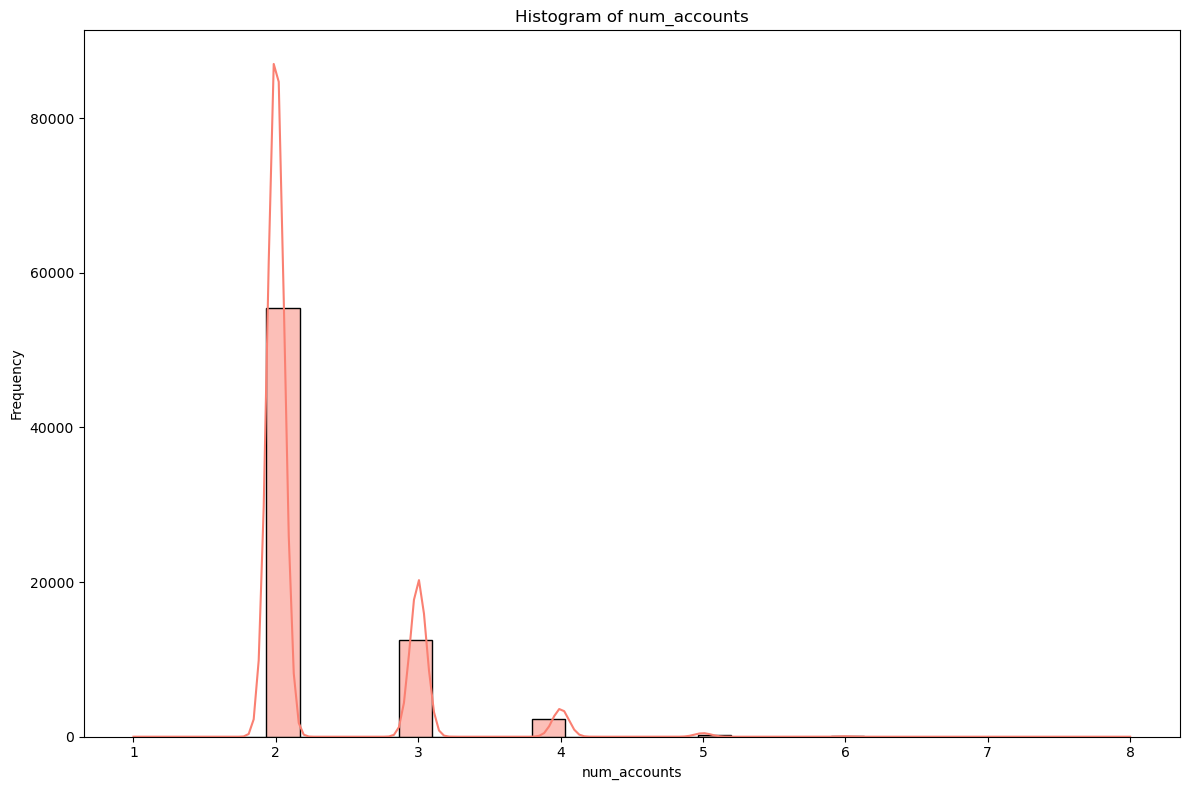

In [30]:
plot_histogram(df_demo, 'num_accounts', bins=30)

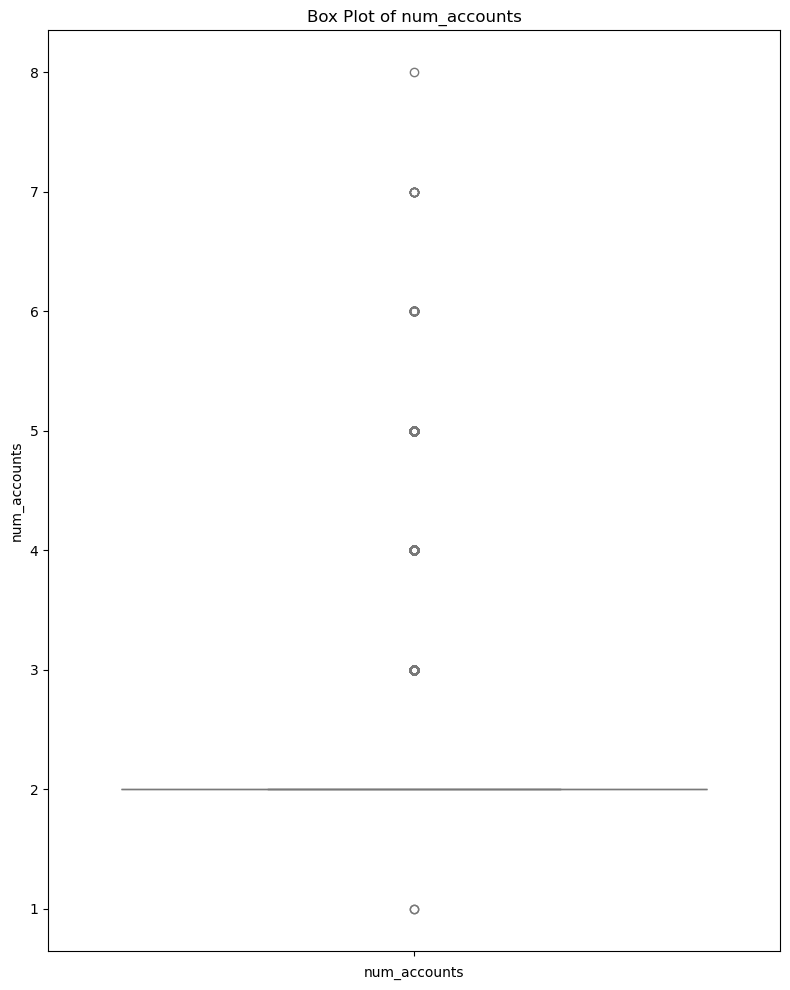

In [31]:
plot_boxplot(df_demo, 'num_accounts')

### EDA univariate conclusions

The **vast majority of clients (78.61%) have 2 accounts**, wich is also median, mode and practically the mean (2.26).

The standard deviation is 0.53, reflecting that there’s minimal variation in the number of accounts per client and most clients hold a low number of accounts.

We have a high and positive Skewness (2.29) wich points out that distribution is heavilyy right-skewed. A small number of clients holds significantly more accounts. Also the distribution has a **sharp peak around 2 accounts** (6.09 of Kurtosis), we can see it  in the visualization graphics.

## 6. Balance

### Mesaures of Centrality

In [32]:
column_to_analyze = 'balance'

# Calcular estadísticas para la columna seleccionada
centrality_balance = calculate_centrality(df_demo, column_to_analyze)
centrality_balance

{'Mean': 147450.34, 'Median': 63336.585, 'Mode': 31188.62}

### Measures of Dispersion

In [33]:
column_to_analyze = 'balance'

# Calcular estadísticas para la columna seleccionada
dispersion_balance = calculate_dispersion(df_demo, column_to_analyze)
dispersion_balance

{'Variance': 90910751855.38,
 'Standard Deviation': 301514.1,
 'Min': 13789.419999999998,
 'Max': 16320040.15,
 'Range': 16306250.73,
 'Quantiles': {0.25: 37348.555, 0.5: 63336.585, 0.75: 137548.70500000002}}

### Shape of distribution

In [34]:
calculate_skewness_kurtosis(df_demo, 'balance')

{'Skewness': 11.16, 'Kurtosis': 278.2}

### Visualization

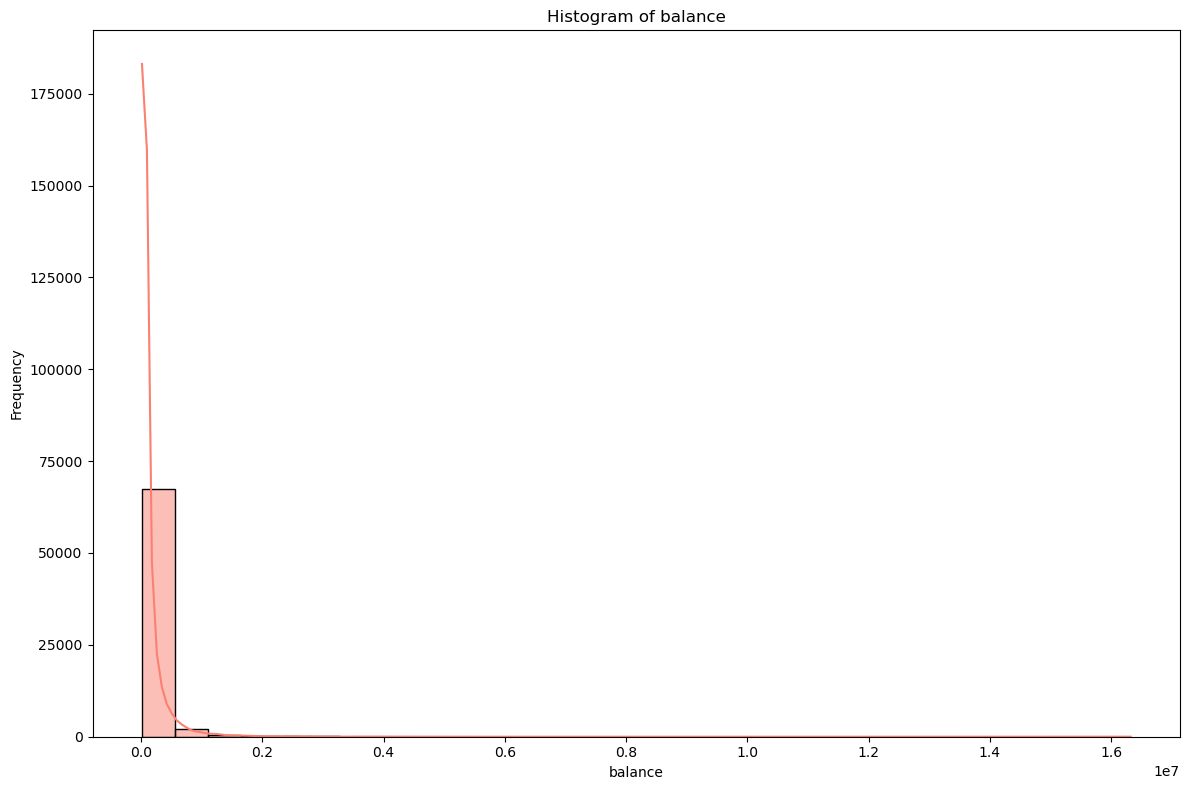

In [35]:
plot_histogram(df_demo, 'balance', bins=30)

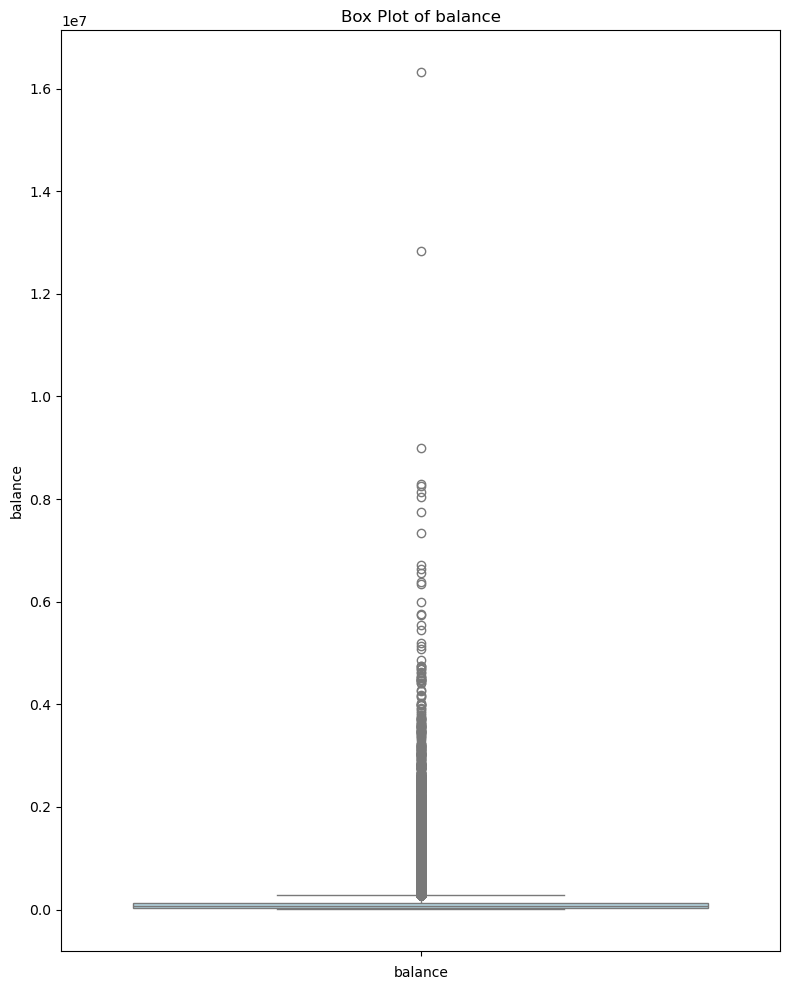

In [36]:
plot_boxplot(df_demo, 'balance')

### EDA univariate conclusions

The mean (147450) is very high compared with the median (63336), which indicates that there is an **skewed right distribution**, what means a long tail on the higher values. Also the standar deviation (301514) and the range (over 16 millions) are extremely high.

As we had seen with the dispersion measures, the distribution is **extremely skewed to the right** with a high 11.16 value. 
Also the Kurtosis is exaggeratedly high (278.2), so we know that it has a **huge peak** and a few extreme outliers. But as we can see in the graphs, the vast majority of clients have lower balances, up to 500000.

## 7. Calls_last_6_months

In [37]:
# Frequency table for calls in the last 6 months
freq_calls = df_demo['calls_last_6_months'].value_counts()

# Calculating the proportion of each number of calls
perc_calls = df_demo['calls_last_6_months'].value_counts(normalize=True)

freq_calls, perc_calls

(calls_last_6_months
 6.0    14111
 1.0    11015
 2.0    10252
 3.0     8752
 0.0     7732
 4.0     7174
 5.0     6627
 7.0     4929
 Name: count, dtype: int64,
 calls_last_6_months
 6.0    0.199895
 1.0    0.156038
 2.0    0.145229
 3.0    0.123980
 0.0    0.109531
 4.0    0.101626
 5.0    0.093877
 7.0    0.069824
 Name: proportion, dtype: float64)

### Mesaures of Centrality

In [38]:
column_to_analyze = 'calls_last_6_months'

# Calcular estadísticas para la columna seleccionada
centrality_calls = calculate_centrality(df_demo, column_to_analyze)
centrality_calls

{'Mean': 3.38, 'Median': 3.0, 'Mode': 6.0}

### Measures of Dispersion

In [39]:
column_to_analyze = 'calls_last_6_months'

# Calcular estadísticas para la columna seleccionada
dispersion_calls = calculate_dispersion(df_demo, column_to_analyze)
dispersion_calls

{'Variance': 5.0,
 'Standard Deviation': 2.24,
 'Min': 0.0,
 'Max': 7.0,
 'Range': 7.0,
 'Quantiles': {0.25: 1.0, 0.5: 3.0, 0.75: 6.0}}

### Shape of distribution

In [40]:
calculate_skewness_kurtosis(df_demo, 'calls_last_6_months')

{'Skewness': 0.05, 'Kurtosis': -1.33}

### Visualizations

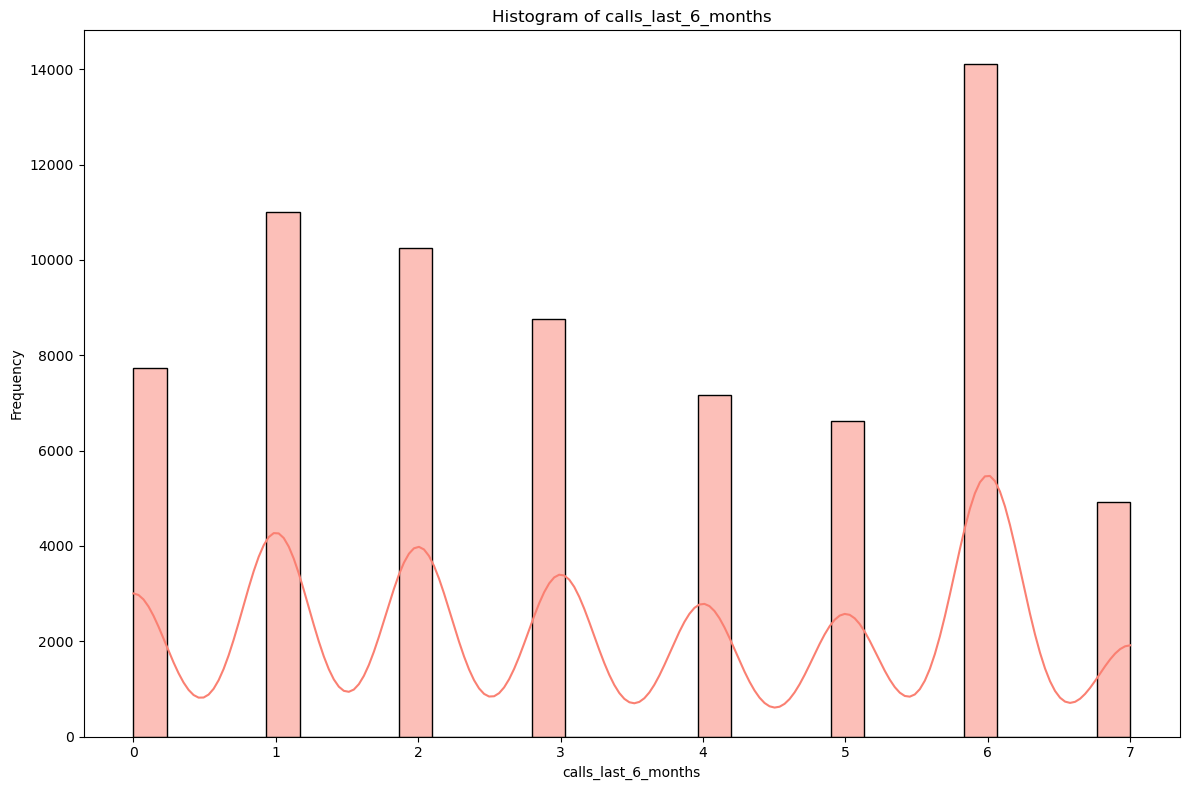

In [41]:
plot_histogram(df_demo, 'calls_last_6_months', bins=30)

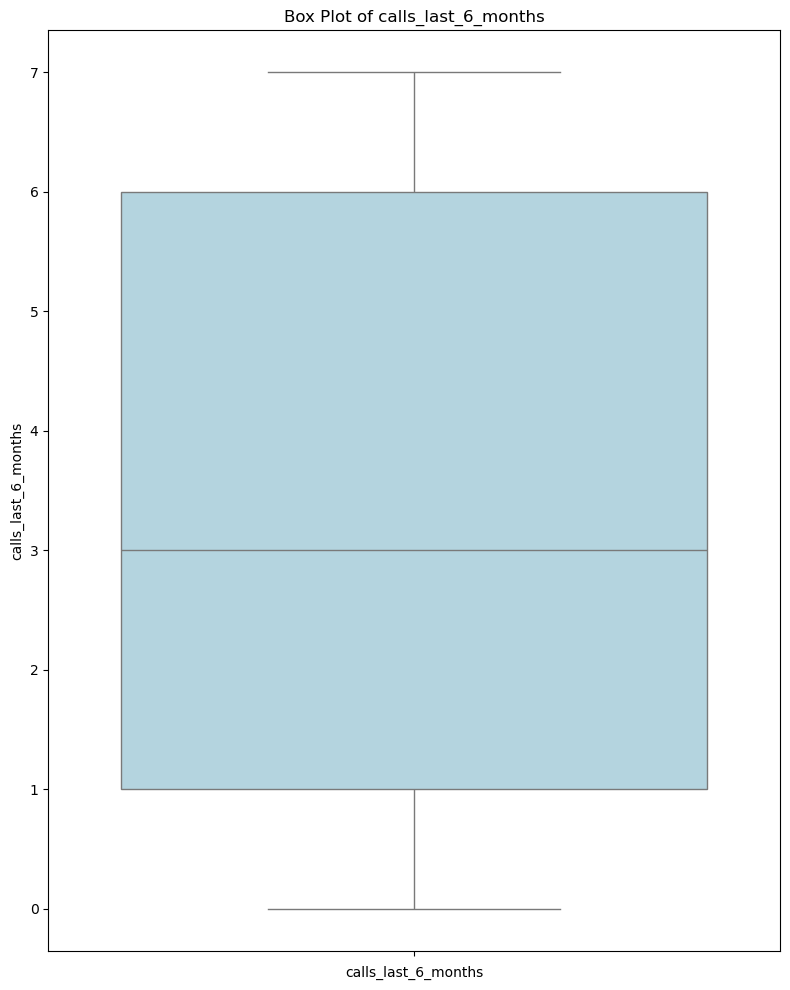

In [42]:
plot_boxplot(df_demo, 'calls_last_6_months')

c:\Users\anano\OneDrive\Documentos\Ironhack\semana_5\project_semana_5\Vanguard-AB-Test-Analysis\functions.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="pastel")


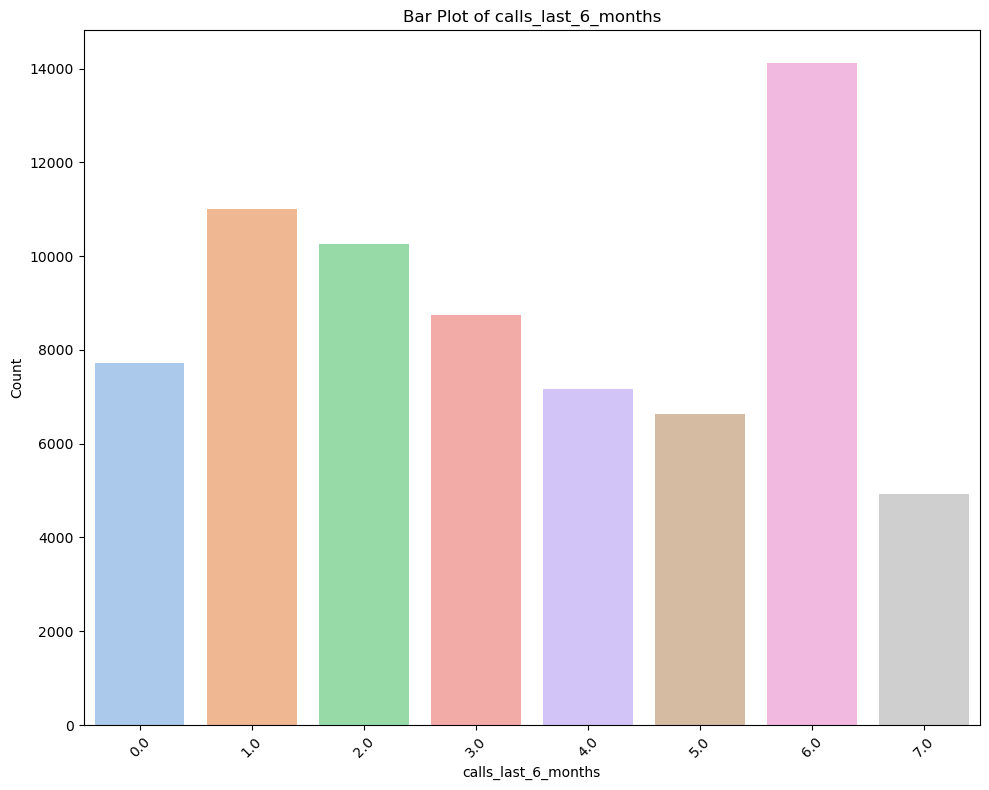

In [43]:
plot_barplot(df_demo, 'calls_last_6_months')

### EDA univariate conclusions

Most clients make **around 3 calls** over this six months, wich is the median and the mean is near (3.38). But the mode is six, with about 20% of clients highly active contacting support. Also there ar a 10.95% clients with no calls, so the **distribution is wide**.

This distribution (0.05) is close to symmetrical and flatter, so there's more spread and fewer extreme values.

## 8. Logons_last_6_months

In [44]:
# Frequency table for logons in the last 6 months
freq_logons = df_demo['logons_last_6_months'].value_counts()

# Calculating the proportion of each number of logons
perc_logons = df_demo['logons_last_6_months'].value_counts(normalize=True)

freq_logons, perc_logons

(logons_last_6_months
 9.0    12349
 3.0    10243
 4.0    10219
 7.0     9893
 5.0     9253
 6.0     7878
 8.0     4810
 2.0     3009
 1.0     2938
 Name: count, dtype: int64,
 logons_last_6_months
 9.0    0.174935
 3.0    0.145101
 4.0    0.144761
 7.0    0.140143
 5.0    0.131077
 6.0    0.111599
 8.0    0.068138
 2.0    0.042625
 1.0    0.041619
 Name: proportion, dtype: float64)

### Mesaures of Centrality

In [45]:
column_to_analyze = 'logons_last_6_months'

# Calcular estadísticas para la columna seleccionada
centrality_logons = calculate_centrality(df_demo, column_to_analyze)
centrality_logons

{'Mean': 5.57, 'Median': 5.0, 'Mode': 9.0}

### Measures of Dispersion

In [46]:
column_to_analyze = 'logons_last_6_months'

# Calcular estadísticas para la columna seleccionada
dispersion_logons = calculate_dispersion(df_demo, column_to_analyze)
dispersion_logons

{'Variance': 5.54,
 'Standard Deviation': 2.35,
 'Min': 1.0,
 'Max': 9.0,
 'Range': 8.0,
 'Quantiles': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0}}

### Shape of distribution

In [47]:
calculate_skewness_kurtosis(df_demo, 'logons_last_6_months')

{'Skewness': -0.03, 'Kurtosis': -1.06}

### Visualizations

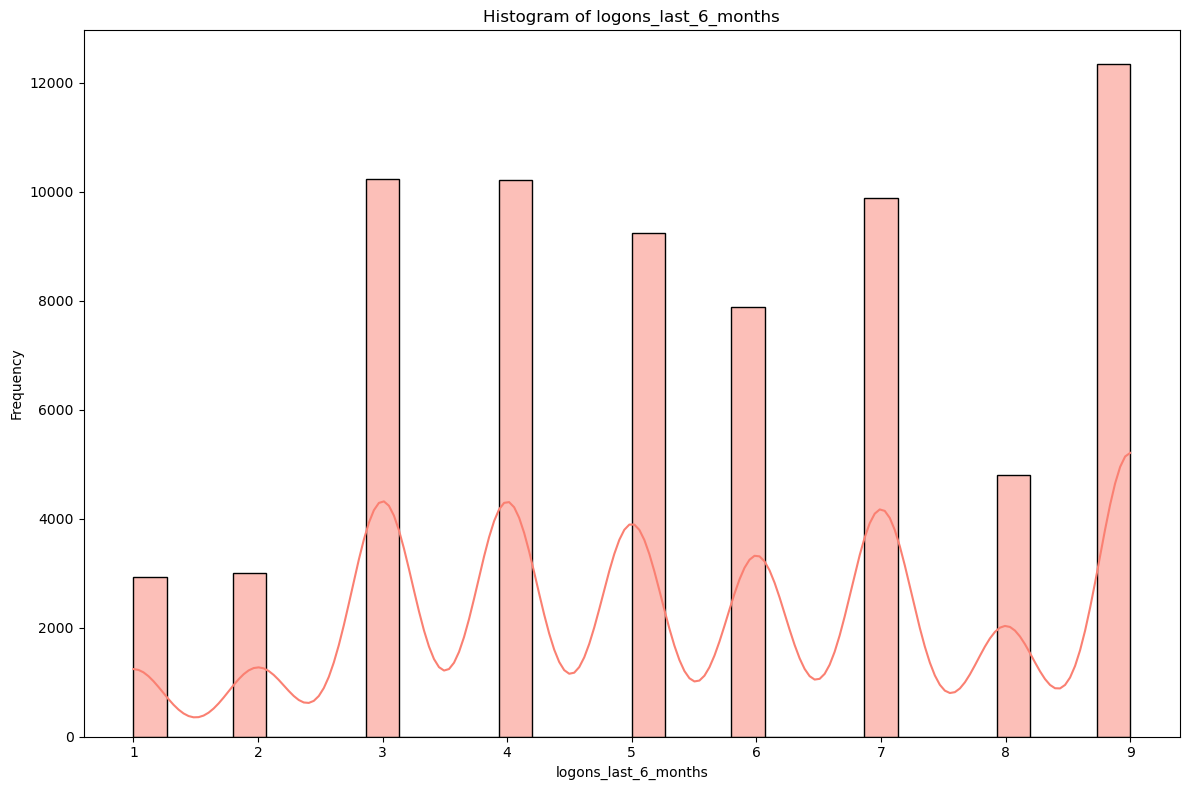

In [48]:
plot_histogram(df_demo, 'logons_last_6_months', bins=30)

c:\Users\anano\OneDrive\Documentos\Ironhack\semana_5\project_semana_5\Vanguard-AB-Test-Analysis\functions.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="pastel")


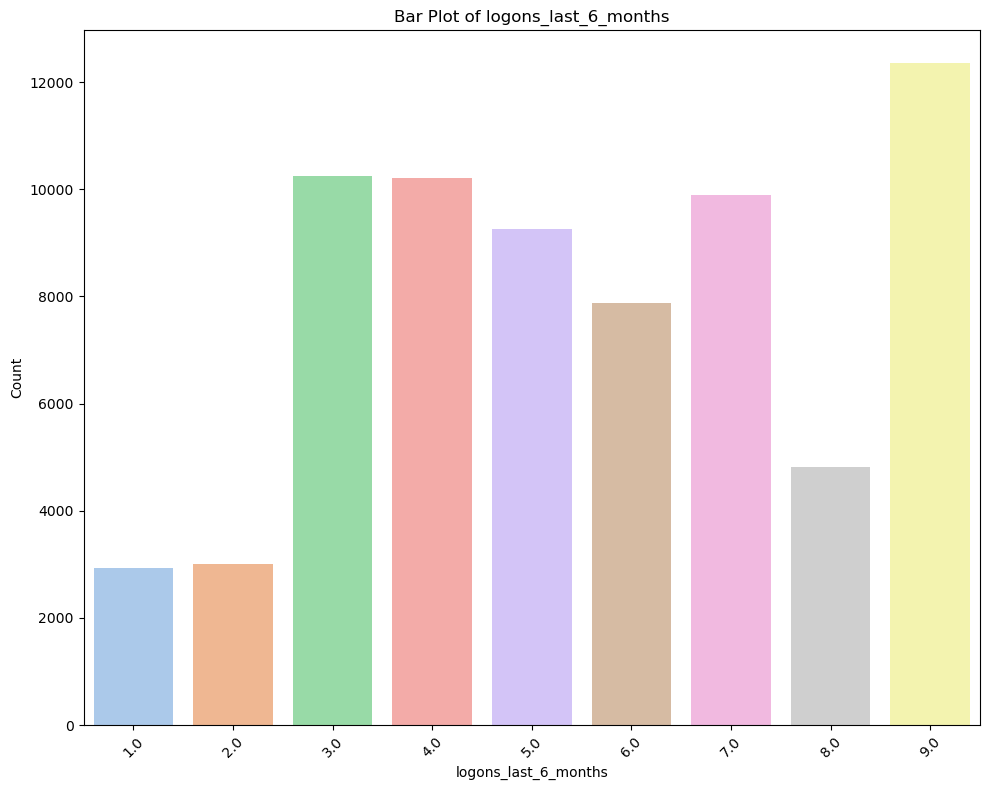

In [49]:
plot_barplot(df_demo, 'logons_last_6_months')

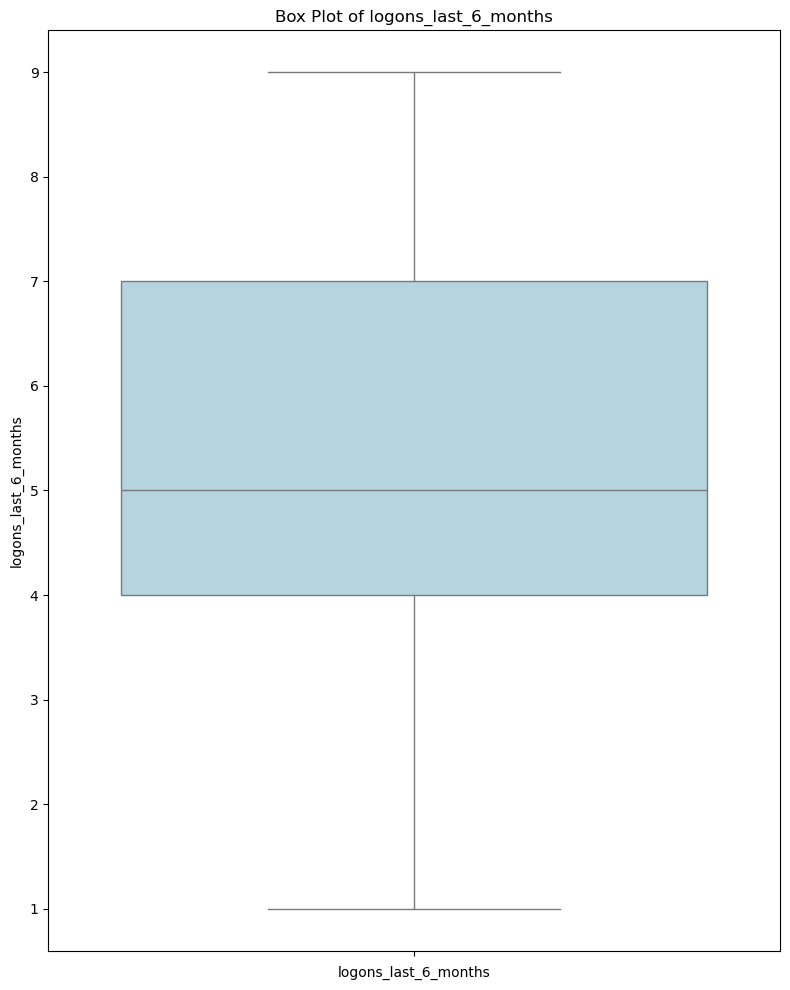

In [50]:
plot_boxplot(df_demo, 'logons_last_6_months')

### EDA univariate conclusion

The mode is 9, meaning is the most common number and **17.49% of clients have high level of activity**. On average, clients log in 5 times during this period. So the range is wide (1 to 9 logons), but with less low activity clients (8.42% with only 1 or 2 logons).

With a skewness value that is almost 0, the distribution is almost symmetric and flatter, because of the negative kurtosis (-1.06).